In [120]:
from music21 import *
import pandas as pd
import os
import matplotlib.pyplot as plt 
import statistics
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
cd 'finalRoseJocelyn'

/storage/home/hpaceice1/jkavanagh3/finalRoseJocelyn


In [3]:
us = environment.UserSettings()
us.getSettingsPath()
us['directoryScratch'] = None
us.getSettingsPath()

PosixPath('/storage/home/hpaceice1/qsun75/.music21rc')

In [50]:
# variable "mydir" must be a path to the directory with the files you want to parse - make sure to END WITH FORWARD SLASH
def loadFileHelper(mydir):
    all_files = []
    for root, dirs, files in os.walk(mydir):
         for file_name in files:
            if file_name.endswith(('.krn')):
                # #un-comment if you want the function to printout all the filenames
                all_files.append(converter.parse(mydir+file_name))
    return(all_files)


### Long Short Duration Ratios

In [51]:
germanScores = loadFileHelper('German/')

In [56]:
germanLongShortRatio = []
for german in germanScores:
    #iterate through each pair of notes in the piece and store consecutive intervals
    long = 0
    short = 0
    flatten = german.flat
    a = flatten.getTimeSignatures()
    denom = a[0].denominator
    numer = a[0].numerator
    if (denom != 4):
        mod = denom % 4
        numer = numer / mod
    center = numer / 2.0
    for i in german.recurse().getElementsByClass('Note'):
        if i.next('Note') is None:
            continue
        dur = i.duration.quarterLength
        if (dur >= center):
            long += 1
        else:
            short += 1
    germanLongShortRatio.append(long/short)
germanLongShortRatio

[0.1388888888888889,
 0.19047619047619047,
 0.26666666666666666,
 0.2857142857142857,
 0.13636363636363635,
 0.0,
 0.2,
 0.02702702702702703,
 0.11475409836065574,
 0.0,
 0.029850746268656716,
 0.5263157894736842]

In [58]:
chineseScores = loadFileHelper('Chinese/')

In [59]:
chineseLongShortRatio = []
for chinese in chineseScores:
    #iterate through each pair of notes in the piece and store consecutive intervals
    long = 0
    short = 0
    flatten = chinese.flat
    a = flatten.getTimeSignatures()
    denom = a[0].denominator
    numer = a[0].numerator
    if (denom != 4):
        mod = denom / 4
        numer = numer / mod
    center = numer / 2.0
    for i in chinese.recurse().getElementsByClass('Note'):
        if i.next('Note') is None:
            continue
        dur = i.duration.quarterLength
        if (dur >= center):
            long += 1
        else:
            short += 1
    chineseLongShortRatio.append(long/short)
chineseLongShortRatio

[0.09322033898305085,
 0.06756756756756757,
 0.3,
 0.11475409836065574,
 0.85,
 0.16666666666666666,
 0.25,
 0.09722222222222222,
 0.057692307692307696,
 0.14942528735632185,
 0.10344827586206896,
 0.18181818181818182]

In [114]:
stats.ttest_ind(longShortRatios['Chinese'],longShortRatios['German'])

Ttest_indResult(statistic=0.5634596626892664, pvalue=0.5788204514684413)

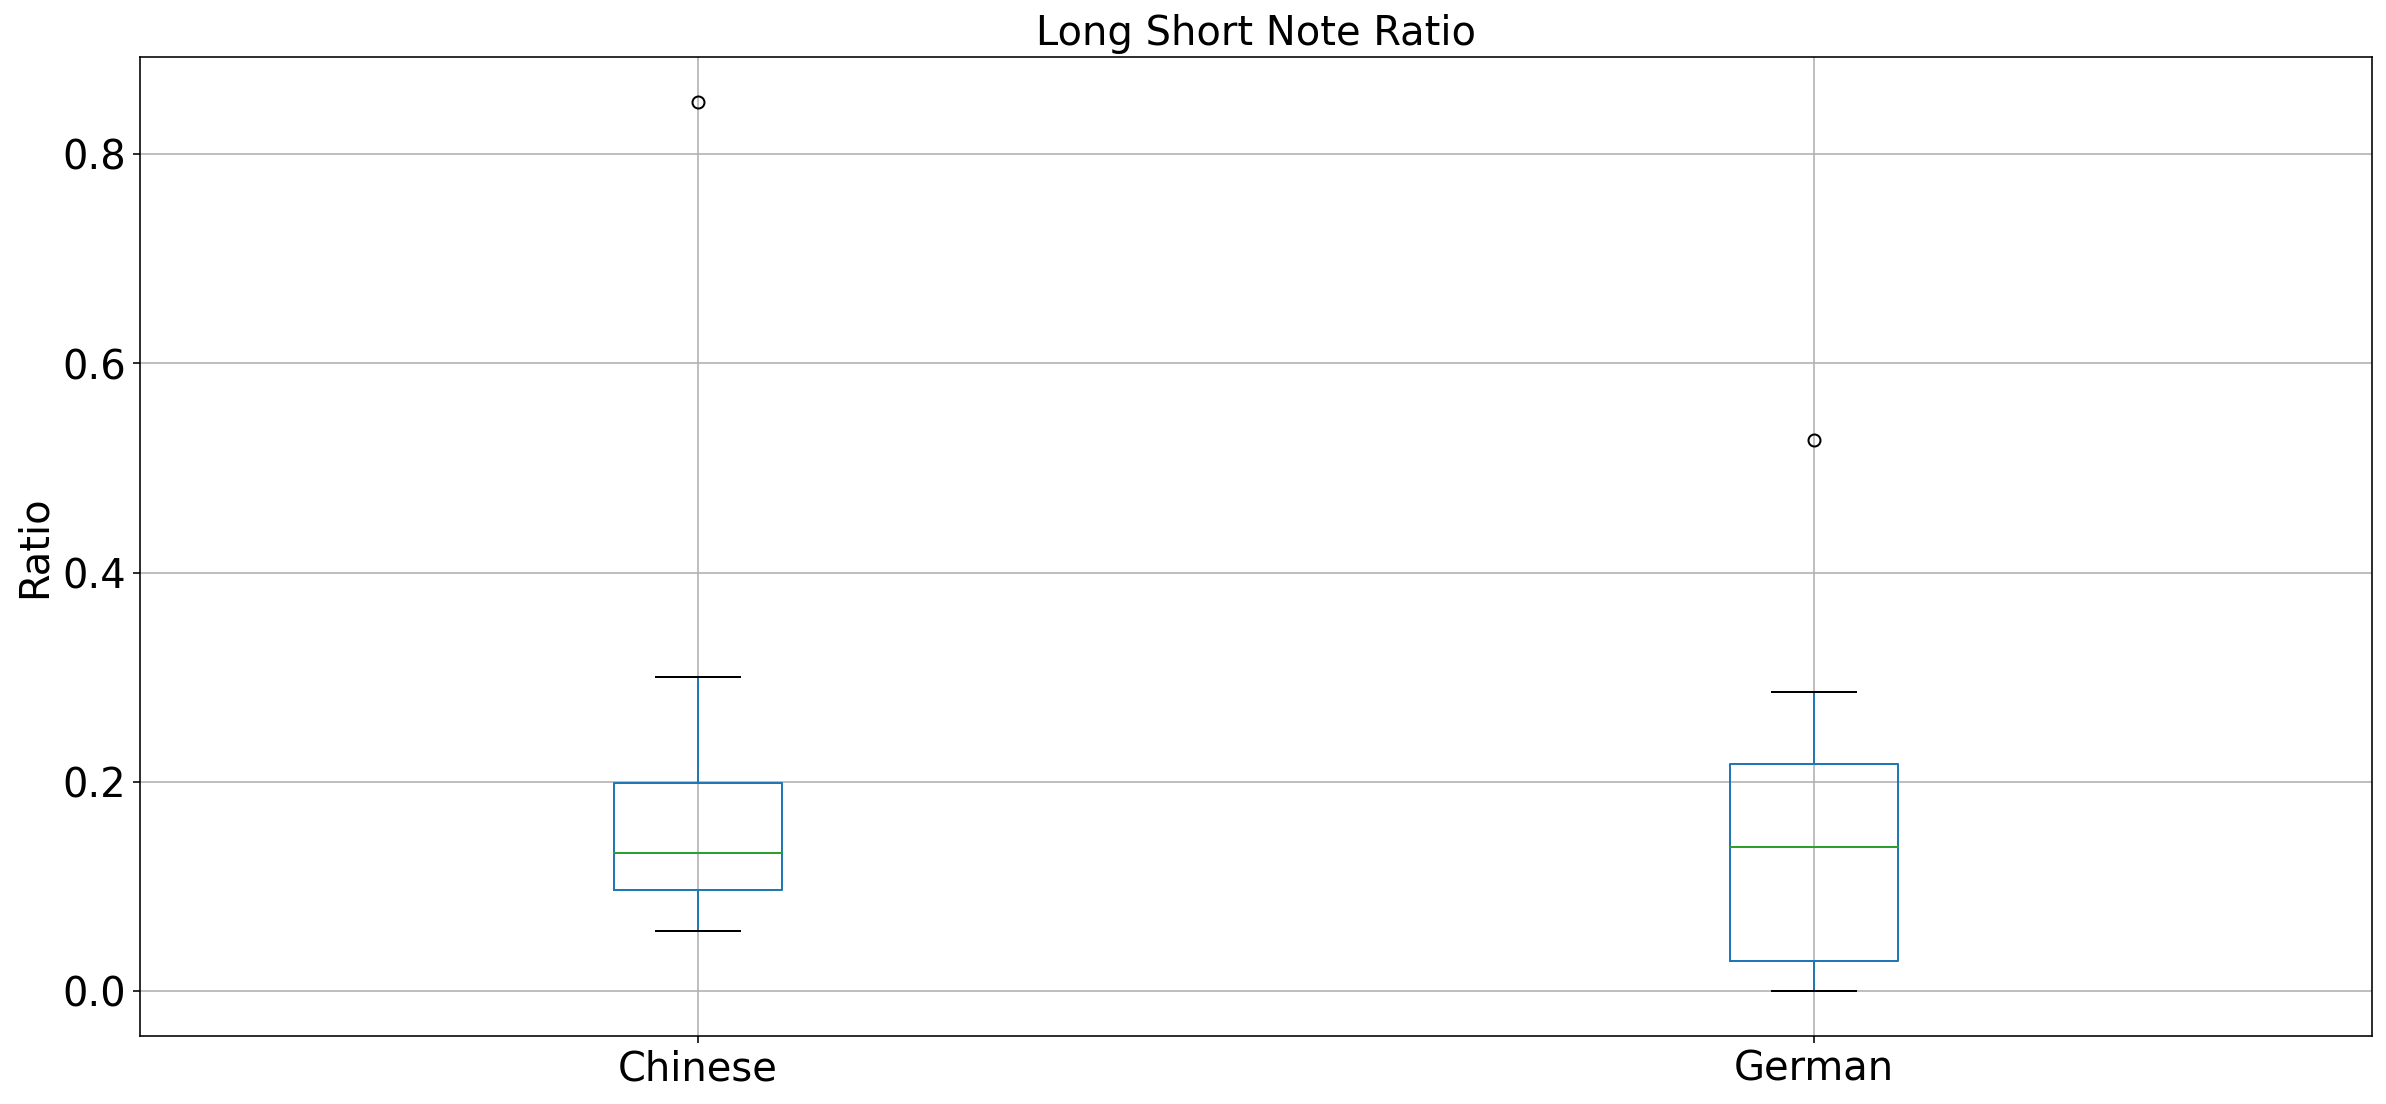

In [115]:
ax = longShortRatios.boxplot(column=['Chinese', 'German'],fontsize=20)
ax.set_title("Long Short Note Ratio",fontsize=20)
ax.set_ylabel('Ratio',fontsize=20)
plt.show()

### Note Density

In [62]:
chineseNoteDensity = []
for chinese in chineseScores:
    flat = chinese.flat
    note_count = len(flat.notes)
    bar_count = len(chinese.parts[0].getElementsByClass('Measure'))
    chineseNoteDensity.append(note_count/bar_count)   
chineseNoteDensity

[8.125,
 5.0,
 3.3125,
 4.6,
 2.375,
 2.75,
 2.9210526315789473,
 4.705882352941177,
 4.666666666666667,
 4.590909090909091,
 4.125,
 3.375]

In [63]:
germanNoteDensity = []
for german in germanScores:
    flat = german.flat
    note_count = len(flat.notes)
    bar_count = len(german.parts[0].getElementsByClass('Measure'))
    germanNoteDensity.append(note_count/bar_count)   
germanNoteDensity

[3.230769230769231,
 3.0,
 2.7857142857142856,
 3.0833333333333335,
 2.888888888888889,
 3.5,
 2.8181818181818183,
 4.529411764705882,
 3.2857142857142856,
 6.0,
 4.117647058823529,
 2.838709677419355]

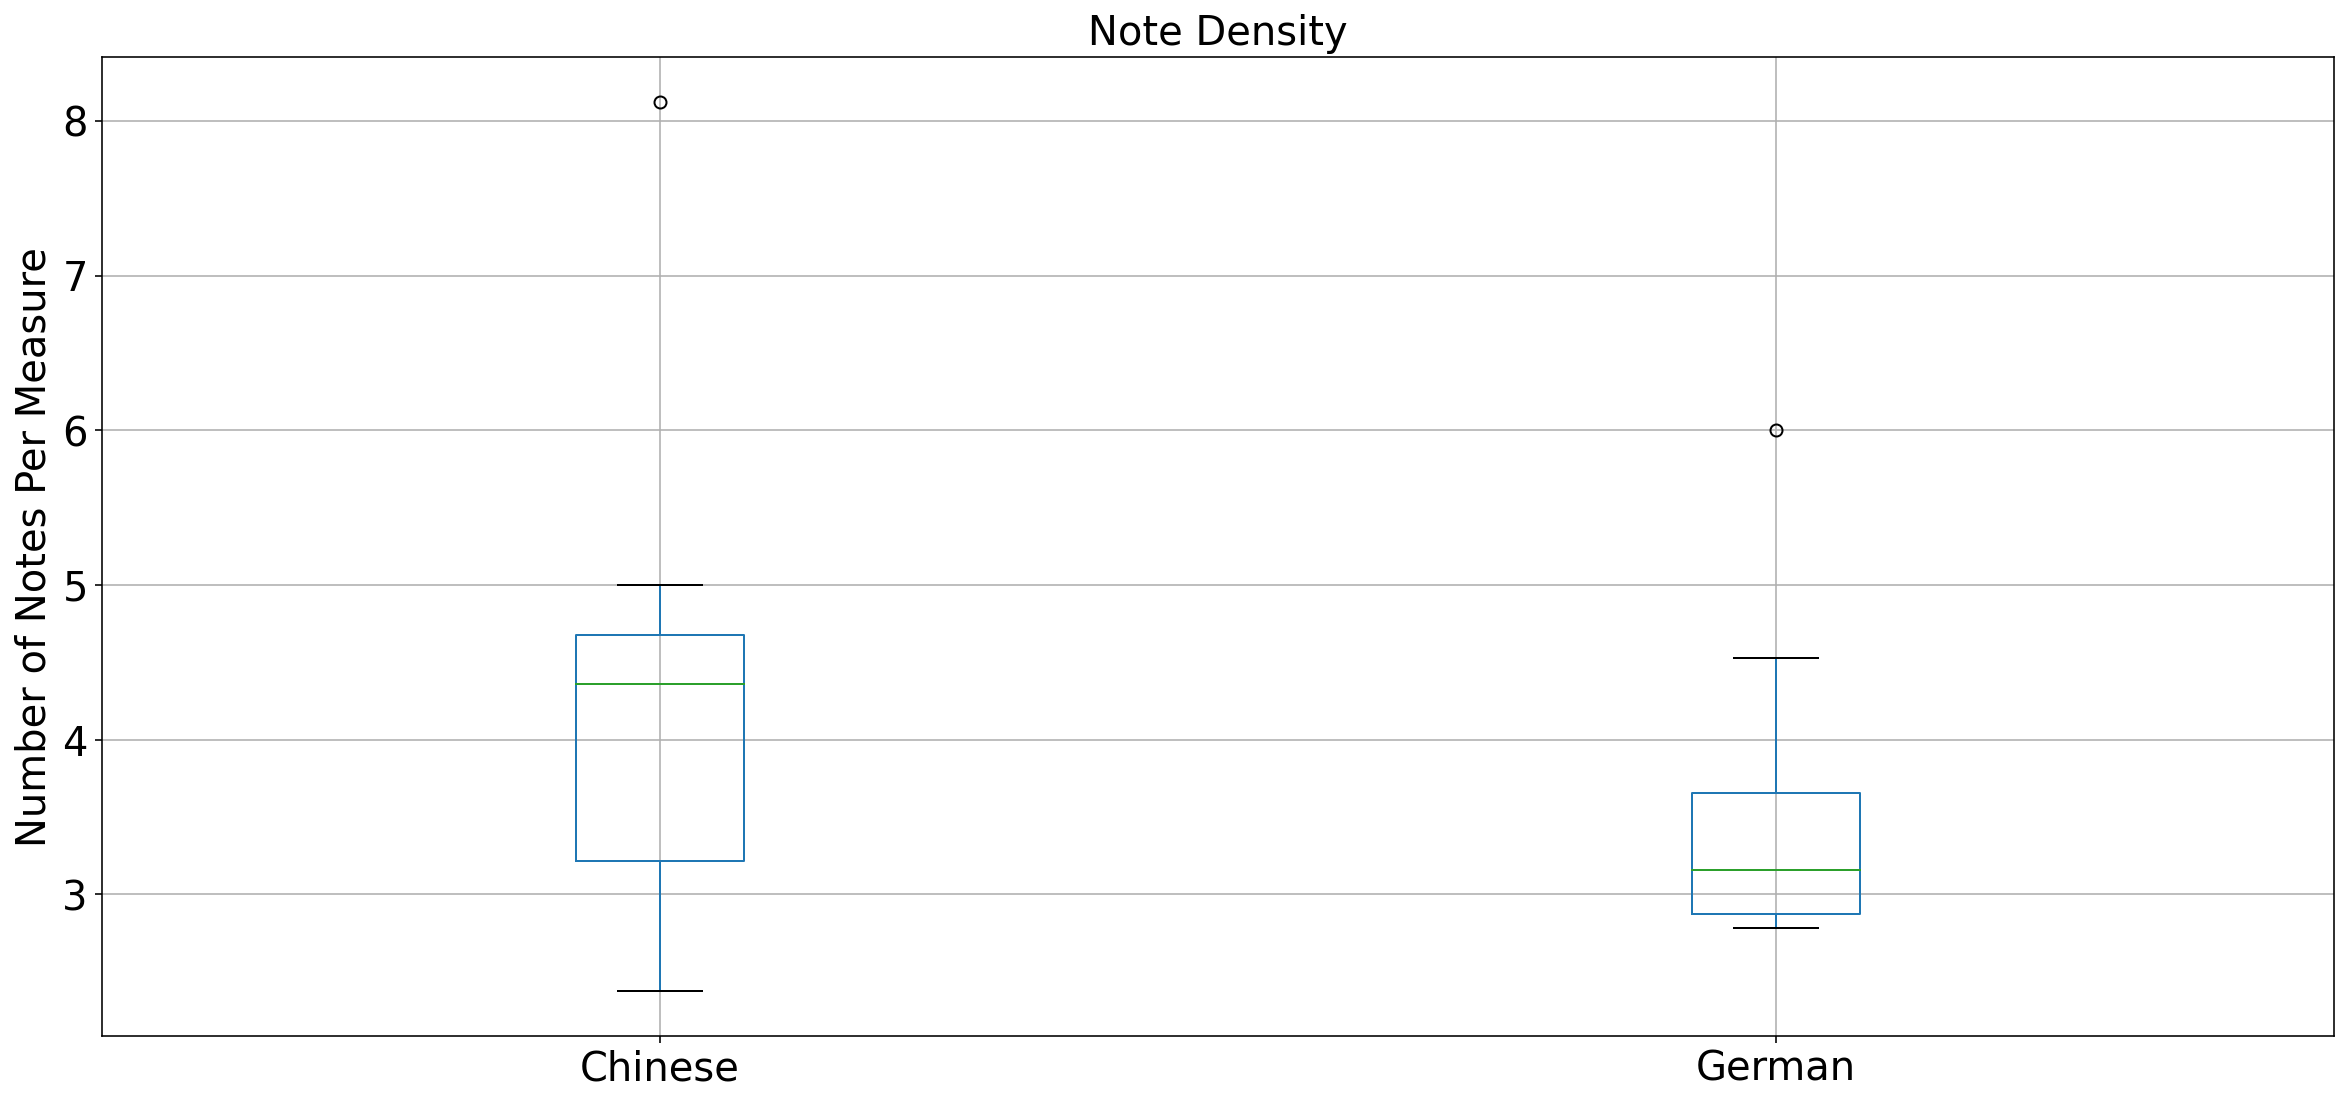

In [116]:
noteDensity = pd.DataFrame({'Chinese': chineseNoteDensity, 'German': germanNoteDensity})
ax = noteDensity.boxplot(column=['Chinese', 'German'],fontsize=20)
ax.set_title("Note Density",fontsize=20)
ax.set_ylabel('Number of Notes Per Measure',fontsize=20)
plt.show()

In [117]:
stats.ttest_ind(noteDensity['Chinese'],noteDensity['German'])

Ttest_indResult(statistic=1.3629169429864707, pvalue=0.18669717907065253)

### Contour and Phrase Length

In [65]:
module use /storage/home/hpaceice1/shared-classes/modules/lmod;
module load humdrum

In [66]:
extract  -i **kern ./finalRoseJocelyn/German/*.krn |  freq | ridx -GLIdM > ~/german.contour

/storage/home/hpaceice1/shared-classes/software/manual/humdrum-tools/humdrum/bin/extract: line 156: [: too many arguments


In [67]:
import pandas as pd
germanData = pd.read_csv('~/german.contour', sep='\t', header=None)
pd.set_option("display.max_rows", None)
germanData

,0
0,{4293.66
1,4369.99
2,4369.99
3,4440.00
4,4493.88
5,4440.00
6,2440.00}
7,{4587.33
8,4440.00
9,4440.00


In [68]:
extract  -i **kern ./finalRoseJocelyn/Chinese/*.krn |  freq | ridx -GLIdM > ~/chinese.contour

/storage/home/hpaceice1/shared-classes/software/manual/humdrum-tools/humdrum/bin/extract: line 156: [: too many arguments


In [69]:
chineseData = pd.read_csv('~/chinese.contour', sep='\t', header=None)
pd.set_option("display.max_rows", None)
chineseData

,0
0,{8311.13
1,8349.23
2,8311.13
3,8349.23
4,8349.23
5,8392.00
6,8392.00
7,16349.23
8,16311.13
9,8392.00


In [70]:
def getContour(pitchData):
    highNotes = []
    lowNotes = []
    begNotes  = []
    endNotes =  []
    phraseLength = []
    phrase = []
    keyNotes = []
    for index, row in pitchData.iterrows():
        if '{' in row[0]:
            count = 0
            freq = float(row[0].replace(')', '')[-6:])
            high = [(freq,0)]
            low = [(freq,0)]
            beg = (freq,0)
            indivPhrase = []
            indivPhrase = [freq]
        elif '}' in row[0]:
            count += 1
            freq = float(row[0].replace(')', '').replace('}', '').replace(']', '')[-6:])
            end = (freq,count)
            indivPhrase.append(freq)
            if high[0][0] < freq:
                high.clear()
                high = [(freq,count)]
            elif high[0][0] == freq:
                high.append((freq,count))
            if low[0][0] > freq:
                low = [(freq,count)]
            elif low[0][0] == freq:
                low.append((freq,count))
            highNotes.append(high)
            lowNotes.append(low)
            begNotes.append(beg)
            endNotes.append(end)
            phraseLength.append(count) 
            phrase.append(indivPhrase)
        elif 'r' not in row[0]:
            count += 1
            freq = float(row[0].replace(')', '').replace(']', '')[-6:])
            indivPhrase.append(freq)
            if high[0][0] < freq:
                high.clear()
                high = [(freq,count)]
            elif high[0][0] == freq:
                high.append((freq,count))
            if low[0][0] > freq:
                low = [(freq,count)]
            elif low[0][0] == freq:
                low.append((freq,count))
    df = pd.DataFrame({'high': highNotes, 'low': lowNotes, 'beg': begNotes, 'end': endNotes, 'phraseLen': phraseLength, 'phrase': phrase})
    return getContourHelper(df, highNotes, lowNotes,begNotes, endNotes)

In [71]:
def getContourHelper(df, highNotes, lowNotes, begNotes, endNotes):
    contour = []
    midpoint = []
    lows = []
    highs =[]
    for i in range(len(highNotes)):
        high = highNotes[i][0][0]
        low = lowNotes[i][0][0]
        highs.append(high)
        lows.append(low)
        mid = (high + low) / 2.0
        midpoint.append(mid)
        beg = begNotes[i][0]
        end = endNotes[i][0]
        multLow = False
        multHigh = False
        if (high == low):
            contour.append('flat')
        elif high == beg:
            if low == end or end < mid:
                contour.append('descend')
            elif high == end or end >= mid:
                contour.append('V')
        elif low == beg:
            if high == end or end >= mid:
                contour.append('ascend')
            elif low == end or end < mid:
                contour.append('/\\')
        else:
            if lowNotes[i][0][1] < highNotes[i][0][1]:
                if (beg < mid) and (end >= mid):
                    contour.append('ascend')
                elif (beg >= mid) and (end >= mid):
                    contour.append('V')
                elif (beg < mid) and (end < mid):
                    contour.append('/\\')
                elif (beg >= mid) and (end < mid):
                    contour.append('\\/\\')
            else:
                if (beg >= mid) and (end < mid):
                    contour.append('descend')
                elif (beg < mid) and (end < mid):
                    contour.append('/\\')
                elif (beg >= mid) and (end >= mid):
                    contour.append("V")
                elif (beg < mid) and (end >= mid):
                    contour.append("N")
    df['contour'] = contour
    return df

In [72]:
germanContour = getContour(germanData)
germanContour

,high,low,beg,end,phraseLen,phrase,contour
0,"[(493.88, 4)]","[(293.66, 0)]","(293.66, 0)","(440.0, 6)",6,"[293.66, 369.99, 369.99, 440.0, 493.88, 440.0,...",ascend
1,"[(587.33, 0)]","[(293.66, 6)]","(587.33, 0)","(329.63, 8)",8,"[587.33, 440.0, 440.0, 369.99, 369.99, 329.63,...",descend
2,"[(392.0, 0), (392.0, 1)]","[(293.66, 5)]","(392.0, 0)","(293.66, 5)",5,"[392.0, 392.0, 369.99, 369.99, 329.63, 293.66]",descend
3,"[(440.0, 0), (440.0, 1), (440.0, 2)]","[(329.63, 6)]","(440.0, 0)","(329.63, 6)",6,"[440.0, 440.0, 440.0, 392.0, 392.0, 369.99, 32...",descend
4,"[(523.25, 4)]","[(440.0, 2)]","(466.16, 0)","(493.88, 5)",5,"[466.16, 466.16, 440.0, 466.16, 523.25, 493.88]",ascend
5,"[(659.26, 4)]","[(554.37, 2)]","(587.33, 0)","(587.33, 5)",5,"[587.33, 587.33, 554.37, 587.33, 659.26, 587.33]",/\
6,"[(587.33, 3), (587.33, 4)]","[(392.0, 0)]","(392.0, 0)","(440.0, 5)",5,"[392.0, 493.88, 493.88, 587.33, 587.33, 440.0]",/\
7,"[(659.26, 3), (659.26, 4)]","[(440.0, 0)]","(440.0, 0)","(493.88, 5)",5,"[440.0, 523.25, 523.25, 659.26, 659.26, 493.88]",/\
8,"[(739.99, 3), (739.99, 4)]","[(415.3, 7)]","(493.88, 0)","(415.3, 7)",7,"[493.88, 587.33, 587.33, 739.99, 739.99, 659.2...",/\
9,"[(783.99, 4)]","[(440.0, 0)]","(440.0, 0)","(587.33, 7)",7,"[440.0, 493.88, 554.37, 587.33, 783.99, 739.99...",/\


In [73]:
chineseContour = getContour(chineseData)
chineseContour

,high,low,beg,end,phraseLen,phrase,contour
0,"[(466.16, 10)]","[(311.13, 0), (311.13, 2), (311.13, 8)]","(311.13, 0)","(392.0, 11)",11,"[311.13, 349.23, 311.13, 349.23, 349.23, 392.0...",ascend
1,"[(466.16, 2)]","[(311.13, 0), (311.13, 11), (311.13, 12)]","(311.13, 0)","(349.23, 14)",14,"[311.13, 392.0, 466.16, 392.0, 392.0, 349.23, ...",/\
2,"[(466.16, 5), (466.16, 6), (466.16, 11), (466....","[(311.13, 0), (311.13, 2), (311.13, 9)]","(311.13, 0)","(466.16, 12)",12,"[311.13, 349.23, 311.13, 349.23, 392.0, 466.16...",ascend
3,"[(466.16, 2)]","[(311.13, 0), (311.13, 12), (311.13, 13)]","(311.13, 0)","(349.23, 15)",15,"[311.13, 392.0, 466.16, 392.0, 392.0, 392.0, 3...",/\
4,"[(587.33, 5)]","[(349.23, 0), (349.23, 1)]","(349.23, 0)","(523.25, 11)",11,"[349.23, 349.23, 392.0, 466.16, 523.25, 587.33...",ascend
5,"[(523.25, 4)]","[(349.23, 0), (349.23, 1), (349.23, 10), (349....","(349.23, 0)","(349.23, 12)",12,"[349.23, 349.23, 392.0, 466.16, 523.25, 466.16...",/\
6,"[(392.0, 3), (392.0, 5), (392.0, 6)]","[(261.63, 0), (261.63, 1)]","(261.63, 0)","(392.0, 6)",6,"[261.63, 261.63, 349.23, 392.0, 349.23, 392.0,...",ascend
7,"[(523.25, 4)]","[(349.23, 1), (349.23, 2)]","(466.16, 0)","(466.16, 6)",6,"[466.16, 349.23, 349.23, 466.16, 523.25, 466.1...",V
8,"[(783.99, 4)]","[(523.25, 0), (523.25, 1), (523.25, 6), (523.2...","(523.25, 0)","(523.25, 12)",12,"[523.25, 523.25, 622.25, 698.46, 783.99, 698.4...",/\
9,"[(783.99, 4)]","[(392.0, 11), (392.0, 12)]","(523.25, 0)","(392.0, 12)",12,"[523.25, 523.25, 622.25, 698.46, 783.99, 698.4...",/\


In [74]:
germanContourCt = germanContour['contour'].value_counts()
germanContourCt = pd.Series(germanContourCt)
germanContourCt

descend    28
/\         27
ascend     17
V          11
\/\         4
N           3
Name: contour, dtype: int64

In [75]:
chineseContourCt = chineseContour['contour'].value_counts()
chineseContourCt

/\         39
descend    18
V          11
ascend     10
N           2
\/\         2
Name: contour, dtype: int64

In [76]:
contourCounts = pd.concat([chineseContourCt, germanContourCt], axis=1)
contourCounts.columns = ['Chinese', 'German']
contourCounts

,Chinese,German
/\,39,27
descend,18,28
V,11,11
ascend,10,17
N,2,3
\/\,2,4


In [78]:
stats.chi2_contingency(contourCounts)

(6.679569807497226,
 0.2455823637506362,
 5,
 array([[31.46511628, 34.53488372],
        [21.93023256, 24.06976744],
        [10.48837209, 11.51162791],
        [12.87209302, 14.12790698],
        [ 2.38372093,  2.61627907],
        [ 2.86046512,  3.13953488]]))

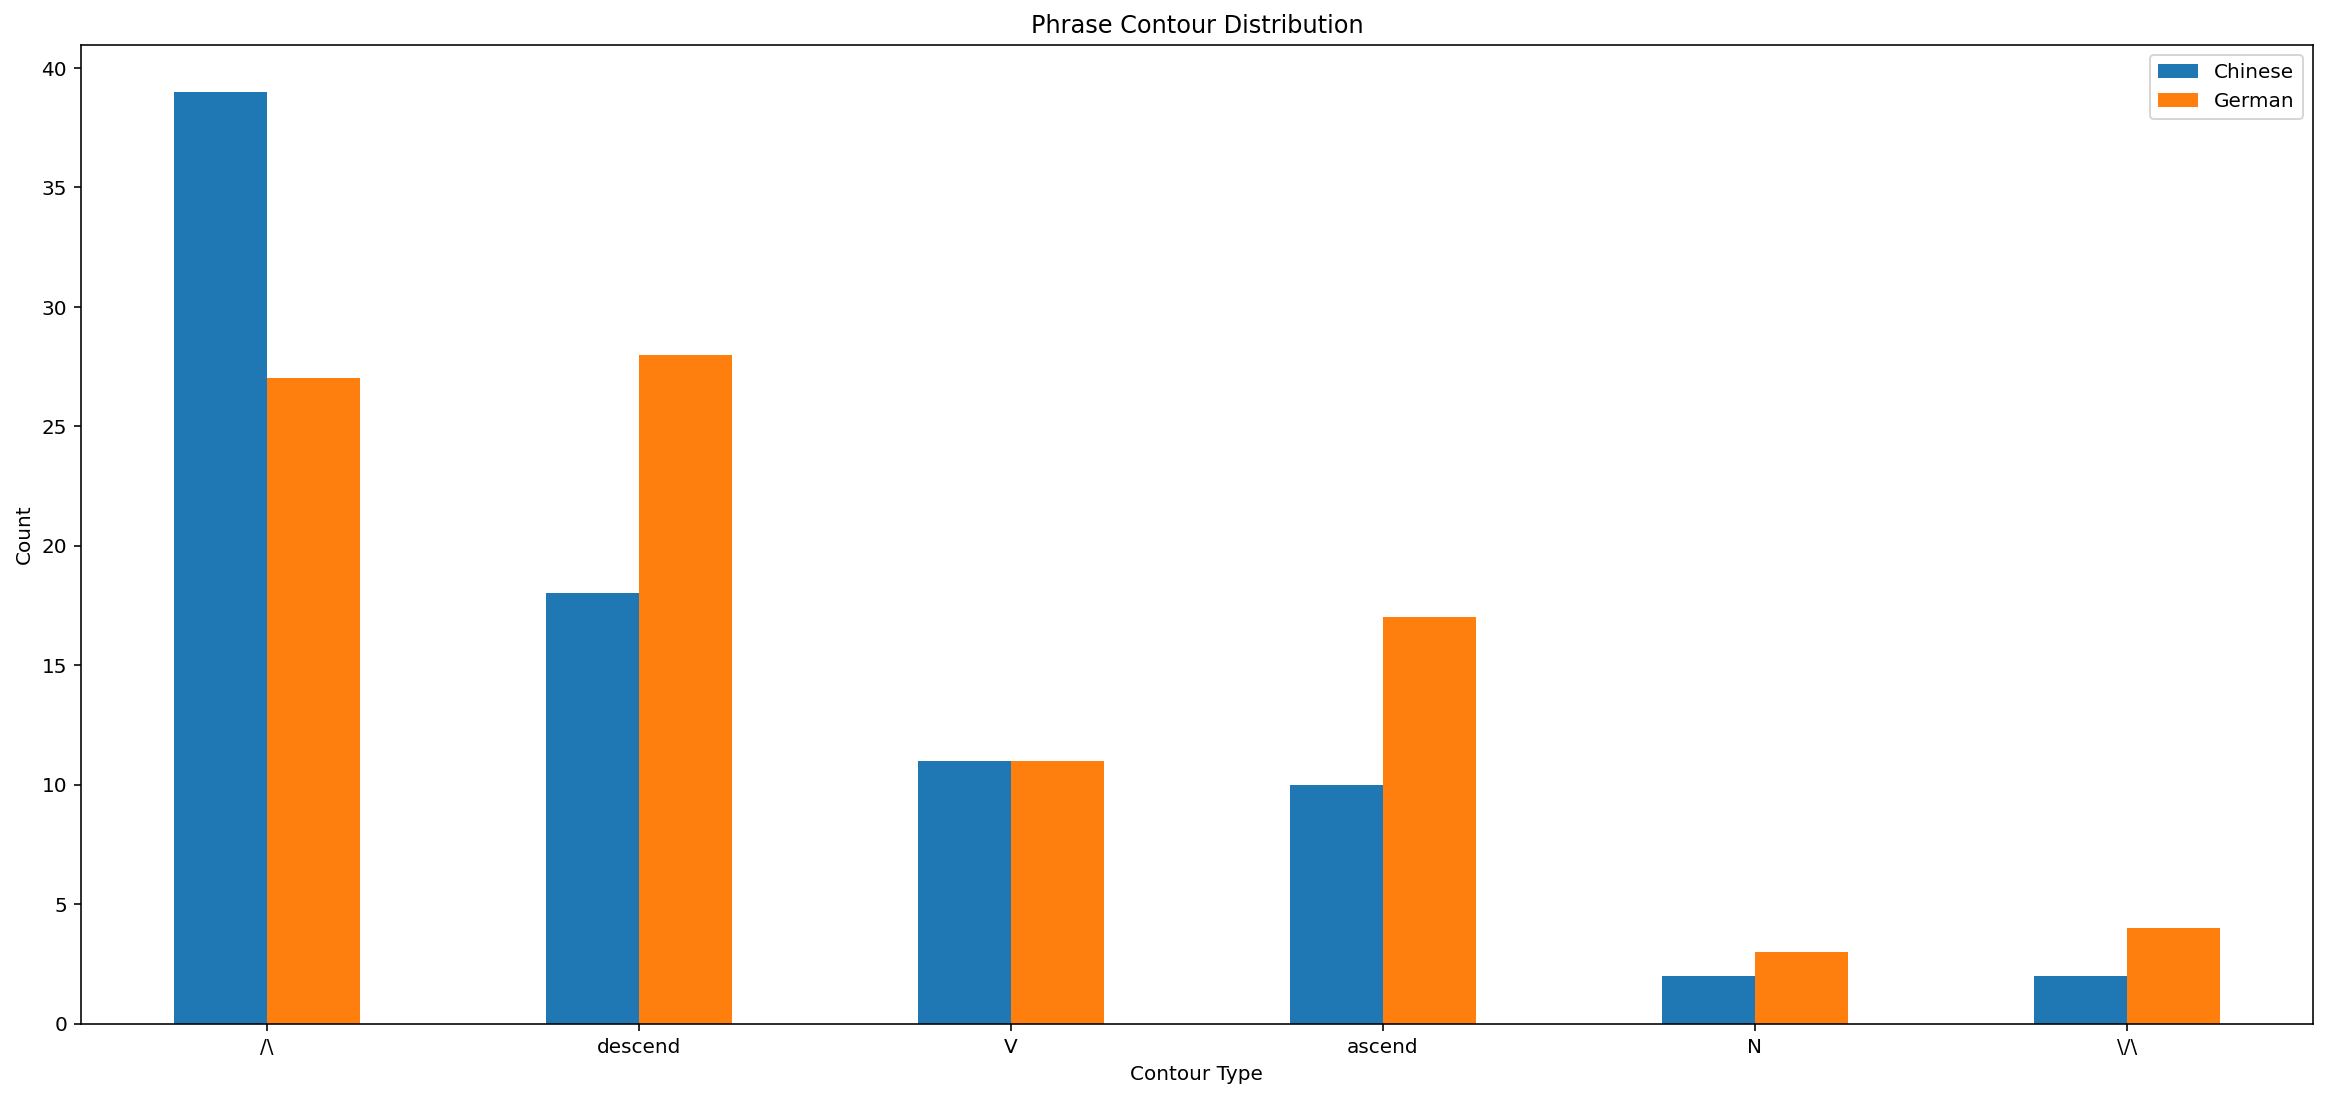

In [79]:
contours = pd.concat([chineseContourCt, germanContourCt], axis=1)
contours.columns=['Chinese', 'German']
ax = contours.plot.bar(title="Phrase Contour Distribution", rot=0)
ax.set_xlabel("Contour Type")
ax.set_ylabel("Count")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()

In [82]:
chinesePhraseLen = chineseContour['phraseLen']
germanPhraseLen = germanContour['phraseLen']
stats.ttest_ind(chinesePhraseLen, germanPhraseLen)

Ttest_indResult(statistic=7.871166447935659, pvalue=3.934270696563509e-13)

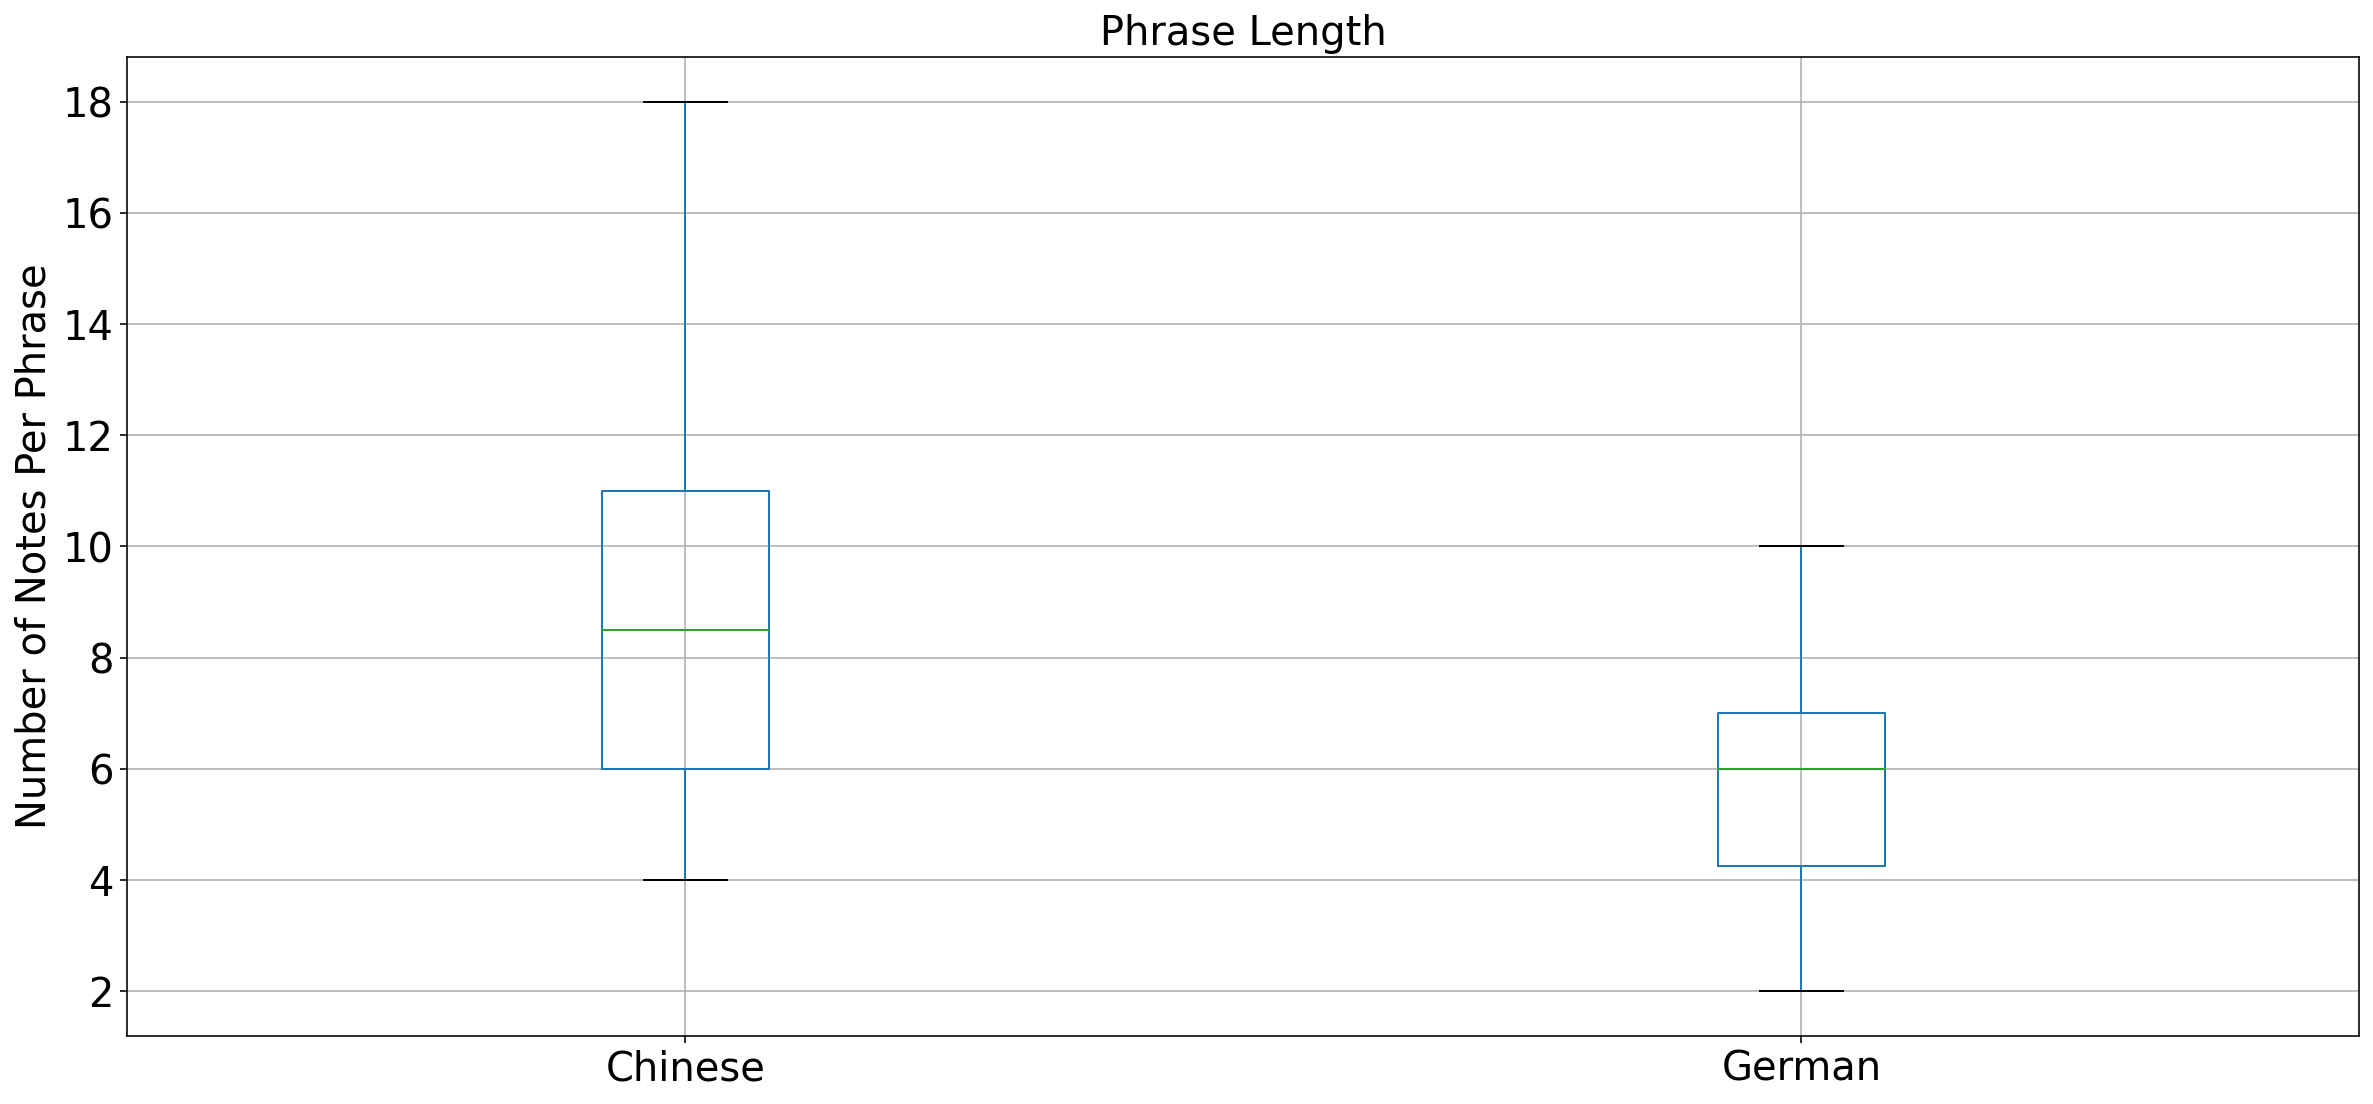

In [118]:
chinesePhraseLen = chineseContour['phraseLen']
germanPhraseLen = germanContour['phraseLen']
PhLen = pd.DataFrame({'Chinese': chinesePhraseLen, 'German': germanPhraseLen})
ax = PhLen.boxplot(column=['Chinese', 'German'],fontsize=20)
ax.set_title("Phrase Length",fontsize=20)
ax.set_ylabel('Number of Notes Per Phrase',fontsize=20)
plt.show()

### Step to Leap Ratios

In [85]:
germanInts = []
germanStepRatio = []
for german in germanScores:
    #iterate through each pair of notes in the piece and store consecutive intervals
    step = 0
    leap = 0
    for i in german.recurse().getElementsByClass('Note'):
        if i.next('Note') is None:
            continue
        thisint = interval.Interval(i, i.next('Note')).semitones
        germanInts.append(thisint)
        if (abs(thisint) <= 3):
            step += 1
        else:
            leap += 1
    germanStepRatio.append(step/leap)
germanInts

[2,
 -2,
 5,
 -1,
 -2,
 -2,
 4,
 0,
 0,
 5,
 -2,
 -2,
 -1,
 0,
 0,
 0,
 1,
 -1,
 -2,
 -2,
 2,
 -2,
 5,
 -1,
 -2,
 -2,
 4,
 0,
 0,
 5,
 -2,
 -2,
 -1,
 0,
 0,
 0,
 1,
 -1,
 -2,
 0,
 -2,
 0,
 3,
 -3,
 0,
 3,
 -3,
 3,
 5,
 -1,
 -2,
 0,
 -2,
 -5,
 2,
 1,
 -3,
 0,
 2,
 1,
 -3,
 3,
 6,
 -2,
 -2,
 4,
 1,
 -12,
 0,
 12,
 -3,
 -4,
 2,
 -3,
 -4,
 5,
 2,
 2,
 -2,
 -7,
 0,
 12,
 -3,
 -4,
 2,
 -3,
 -4,
 5,
 -1,
 -2,
 -2,
 2,
 2,
 1,
 2,
 0,
 2,
 -4,
 7,
 -3,
 -2,
 2,
 -4,
 7,
 -3,
 -2,
 0,
 -2,
 0,
 0,
 0,
 -1,
 0,
 0,
 -2,
 2,
 -2,
 -2,
 4,
 3,
 0,
 0,
 5,
 -5,
 0,
 5,
 -5,
 0,
 -7,
 -2,
 0,
 -2,
 -5,
 9,
 0,
 -2,
 0,
 0,
 -2,
 -5,
 9,
 0,
 0,
 3,
 0,
 -2,
 -3,
 2,
 0,
 0,
 3,
 0,
 -2,
 -3,
 2,
 0,
 1,
 0,
 0,
 2,
 -3,
 0,
 -2,
 0,
 -2,
 7,
 0,
 -2,
 0,
 -1,
 -2,
 5,
 0,
 -7,
 5,
 -1,
 -2,
 0,
 3,
 0,
 -1,
 0,
 5,
 -2,
 -2,
 -1,
 0,
 -2,
 0,
 2,
 0,
 4,
 0,
 -2,
 0,
 -2,
 4,
 0,
 3,
 0,
 -2,
 0,
 -1,
 3,
 0,
 2,
 0,
 -4,
 0,
 2,
 -3,
 0,
 1,
 0,
 -3,
 0,
 -2,
 5,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,

In [86]:
germanStepRatio

[5.833333333333333,
 2.5714285714285716,
 2.8,
 8.0,
 4.0,
 8.0,
 14.0,
 8.5,
 4.230769230769231,
 4.875,
 6.666666666666667,
 2.782608695652174]

In [87]:
germanSeries = pd.Series(germanInts)
germanSeries.apply(lambda x: x).value_counts()

-2     137
 0     137
 2      72
-1      48
-3      35
 1      32
 3      28
 5      23
 7      16
-4      14
 4      14
-5      11
-7       9
 12      5
 9       5
-6       3
 6       2
-9       2
-12      1
dtype: int64

In [89]:
chineseScores = loadFileHelper('Chinese/')

In [90]:
chineseInts = []
chineseStepRatio = []
for chinese in chineseScores:
    #iterate through each pair of notes in the piece and store consecutive intervals
    step = 0
    leap = 0
    for i in chinese.recurse().getElementsByClass('Note'):
        if i.next('Note') is None:
            continue
        thisint = interval.Interval(i, i.next('Note')).semitones
        chineseInts.append(thisint)
        if (abs(thisint) <= 3):
            step += 1
        else:
            leap += 1
    chineseStepRatio.append(step/leap)
chineseInts

[4,
 0,
 -4,
 4,
 0,
 -4,
 4,
 0,
 -4,
 2,
 0,
 -7,
 4,
 0,
 -4,
 2,
 0,
 -2,
 2,
 0,
 -2,
 -5,
 5,
 4,
 3,
 0,
 0,
 -3,
 -2,
 -2,
 2,
 -2,
 -5,
 5,
 4,
 3,
 0,
 0,
 -3,
 -2,
 -2,
 -5,
 7,
 2,
 3,
 0,
 0,
 -3,
 -2,
 -2,
 2,
 -2,
 -3,
 -2,
 2,
 3,
 4,
 0,
 0,
 -2,
 -2,
 -5,
 5,
 0,
 5,
 4,
 0,
 -4,
 4,
 0,
 -4,
 4,
 0,
 -4,
 2,
 0,
 -7,
 4,
 0,
 -4,
 2,
 0,
 -2,
 2,
 0,
 -2,
 -5,
 5,
 5,
 4,
 0,
 0,
 0,
 -2,
 -2,
 2,
 -2,
 -5,
 5,
 4,
 3,
 0,
 0,
 -3,
 -2,
 -2,
 -5,
 7,
 2,
 3,
 0,
 0,
 -3,
 -2,
 -2,
 2,
 -2,
 -3,
 -2,
 2,
 -2,
 4,
 0,
 0,
 -2,
 -2,
 -5,
 5,
 0,
 0,
 0,
 -2,
 -2,
 -3,
 7,
 0,
 -2,
 -2,
 2,
 2,
 3,
 0,
 -3,
 5,
 -2,
 -3,
 5,
 2,
 -2,
 -2,
 -3,
 3,
 -10,
 3,
 4,
 3,
 -3,
 3,
 -3,
 -2,
 -2,
 -3,
 5,
 -2,
 -3,
 3,
 -3,
 5,
 -2,
 -3,
 3,
 -3,
 7,
 3,
 0,
 -3,
 3,
 2,
 -5,
 -2,
 2,
 3,
 -3,
 -2,
 -2,
 2,
 2,
 3,
 -3,
 5,
 2,
 -2,
 -2,
 -3,
 3,
 -10,
 3,
 4,
 3,
 -3,
 3,
 -3,
 -2,
 -2,
 -3,
 5,
 -2,
 -3,
 -2,
 2,
 0,
 -2,
 2,
 0,
 -2,
 2,
 -2,
 -3,
 -2,
 2,
 -2,
 -2,
 2,
 2,
 

In [91]:
chineseStepRatio

[2.0714285714285716,
 5.076923076923077,
 16.333333333333332,
 3.25,
 8.25,
 3.2,
 6.333333333333333,
 5.583333333333333,
 8.166666666666666,
 5.25,
 3.5714285714285716,
 2.7142857142857144]

In [93]:
stats.ttest_ind(chineseStepRatio, germanStepRatio)

Ttest_indResult(statistic=-0.1395057069358961, pvalue=0.8903198021522105)

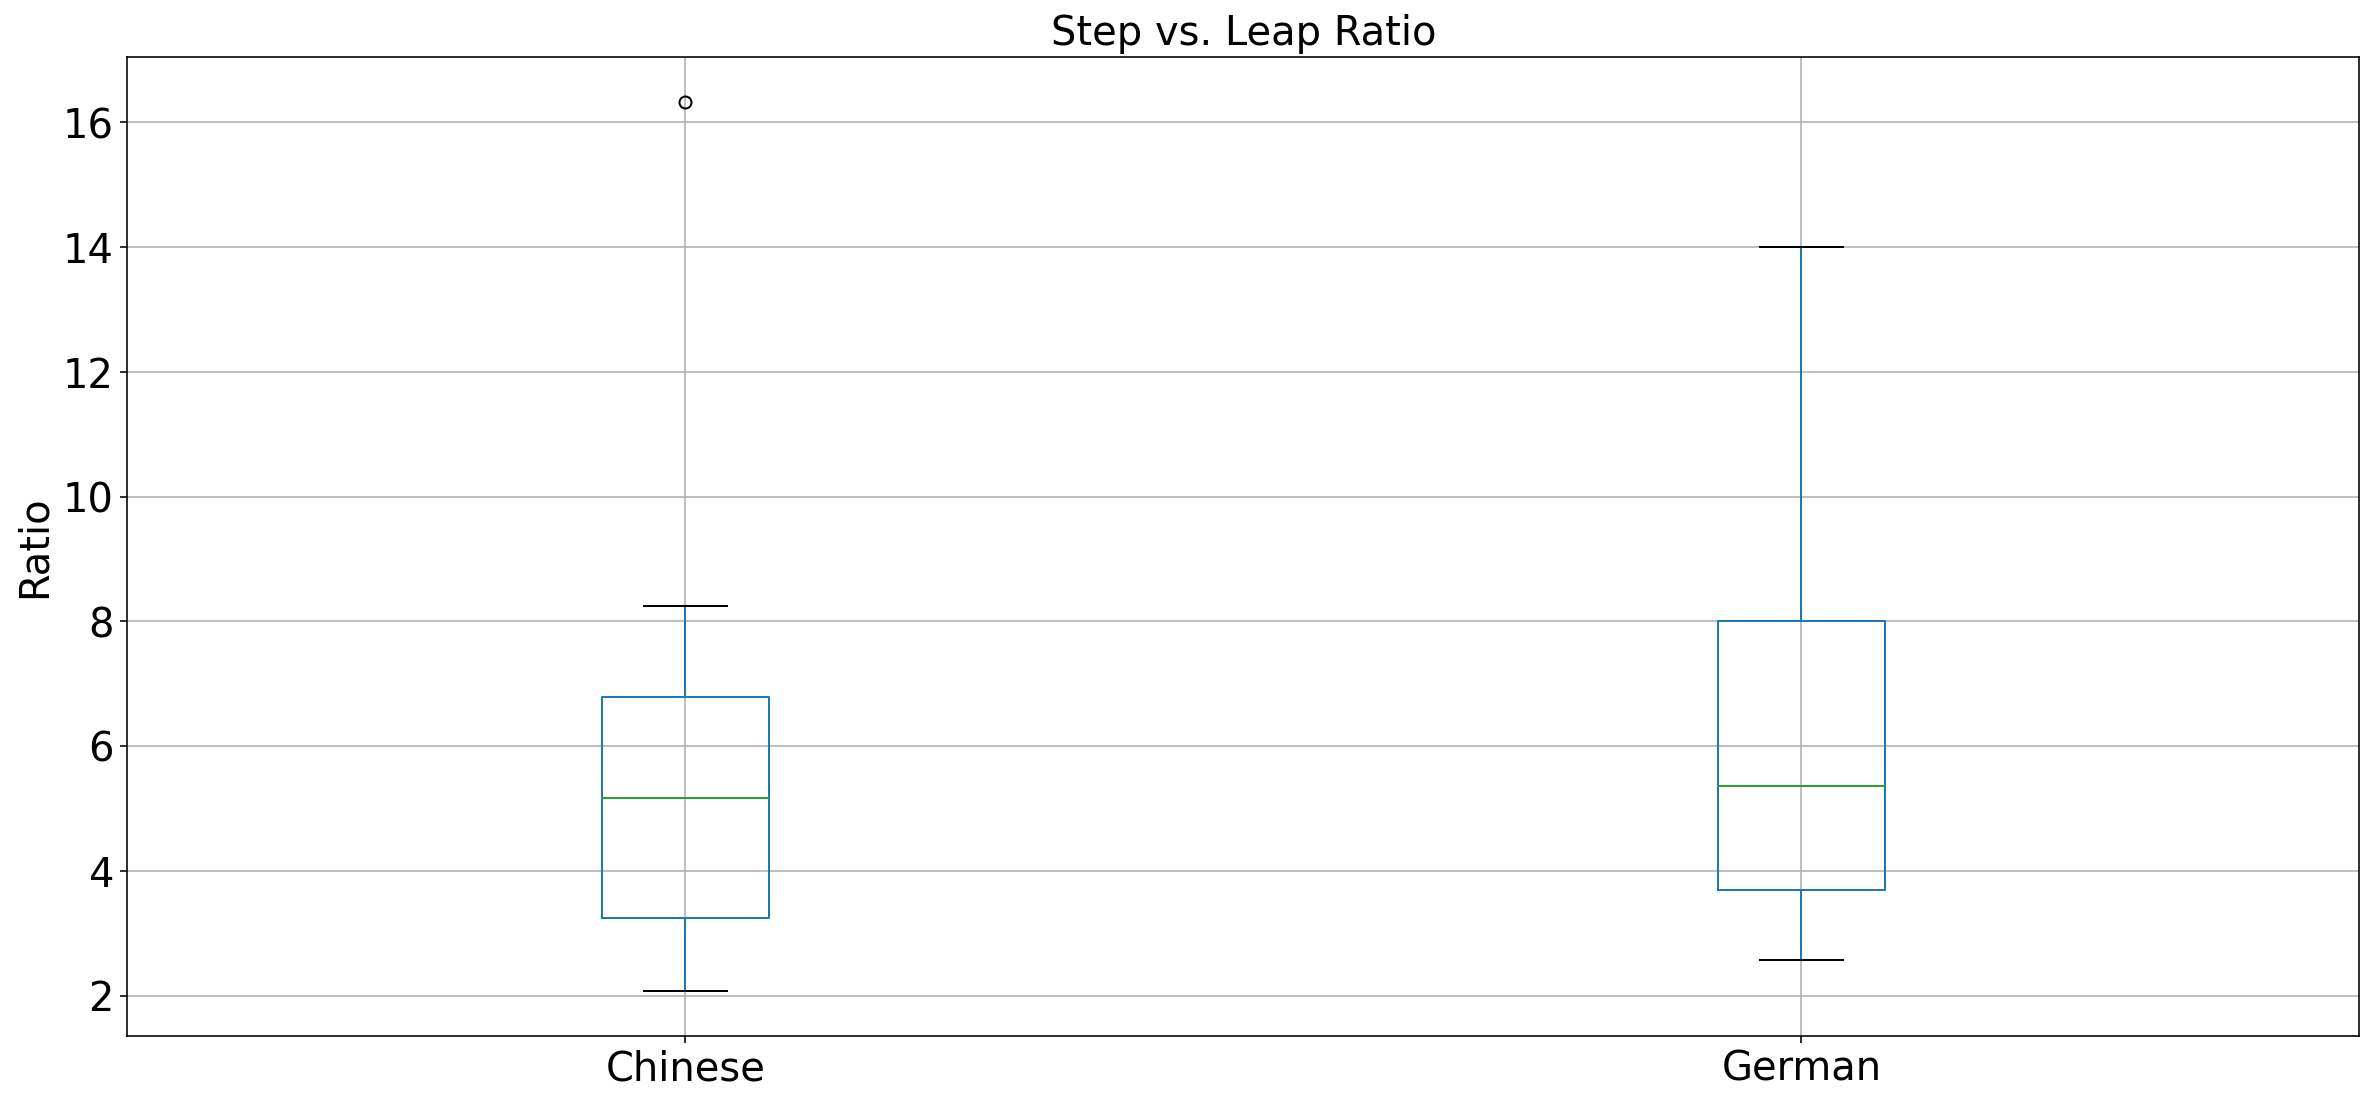

In [119]:
ax = stepRatio.boxplot(column=['Chinese', 'German'],fontsize=20)
ax.set_title("Step vs. Leap Ratio",fontsize=20)
ax.set_ylabel('Ratio',fontsize=20)
plt.show()

In [96]:
chineseSeries = pd.Series(chineseInts)
chineseSeries.apply(lambda x: x).value_counts()

-2     180
 2     145
 0     133
-3      93
 3      82
 5      38
-5      34
 4      24
-4      18
-7      12
 7      10
-1       6
 10      3
 1       3
-10      2
 12      2
 9       2
-9       1
dtype: int64

In [109]:
chineselist = chineseSeries.apply(lambda x: x).value_counts()
germanlist =  germanSeries.apply(lambda x: x).value_counts()
df = pd.DataFrame({"Chinese":chineselist,"German":germanlist})
df.fillna(0)

,Chinese,German
-12,0.0,1.0
-10,2.0,0.0
-9,1.0,2.0
-7,12.0,9.0
-6,0.0,3.0
-5,34.0,11.0
-4,18.0,14.0
-3,93.0,35.0
-2,180.0,137.0
-1,6.0,48.0


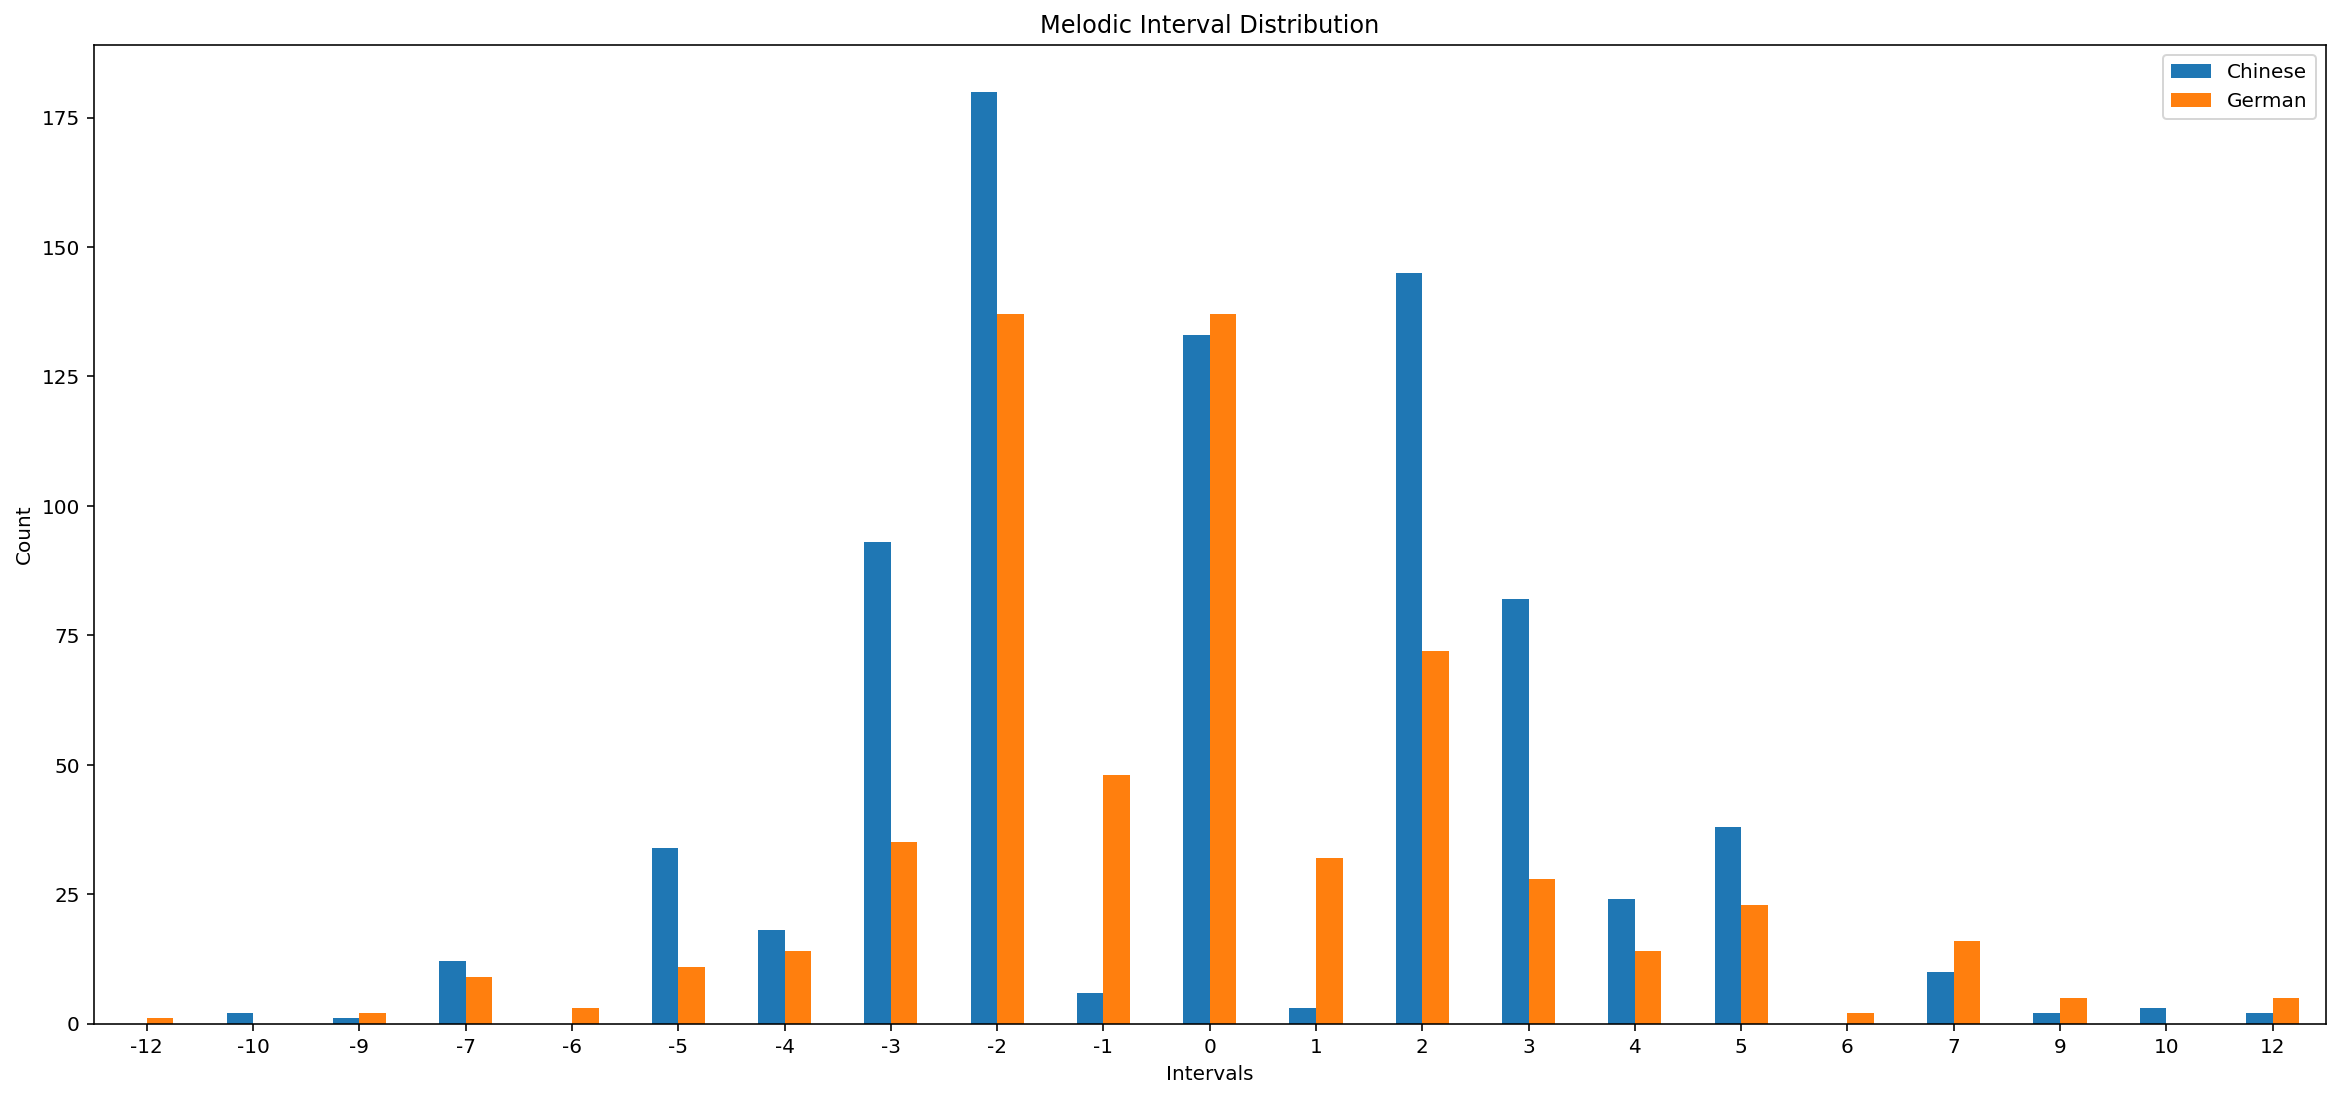

In [99]:
ax = df.plot.bar(rot=0, title="Melodic Interval Distribution")
ax.set_xlabel("Intervals")
ax.set_ylabel("Count")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()